In [ ]:
!pip install -Uq transformers
!pip install -Uq accelerate
!pip install -Uq datasets
!pip install -Uq bertviz
!pip install -Uq umap-learn
!pip install -Uq seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 474.3/474.3 kB 7.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.9/39.9 MB 14.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 7.6 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
cudf-cu12 24.4.1 requires pyarrow<15.0.0a0,>=14.0.1, but you have pyarrow 17.0.0 which is incompatible.
ibis-framework 8.0.0 requires pyarrow<16,>=2, but you have pyarrow 17.0.0 which is incompatible.
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 157.6/157.6 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.2/139.2 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.6/12.6 MB 19.9 MB/

In [ ]:
!pip install evaluate

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.0/84.0 kB 3.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("https://raw.githubusercontent.com/laxmimerit/All-CSV-ML-Data-Files-Download/master/twitter_multi_class_sentiment.csv")

In [ ]:
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16000 entries, 0 to 15999
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        16000 non-null  object
 1   label       16000 non-null  int64 
 2   label_name  16000 non-null  object
dtypes: int64(1), object(2)
memory usage: 375.1+ KB


In [ ]:
df.isnull().sum()

,0
text,0
label,0
label_name,0


In [ ]:
df.head()

,text,label,label_name
0,i didnt feel humiliated,0,sadness
1,i can go from feeling so hopeless to so damned...,0,sadness
2,im grabbing a minute to post i feel greedy wrong,3,anger
3,i am ever feeling nostalgic about the fireplac...,2,love
4,i am feeling grouchy,3,anger


In [ ]:
df['label_name'].value_counts()

,count
label_name,
joy,5362
sadness,4666
anger,2159
fear,1937
love,1304
surprise,572


## Dataset Analysis

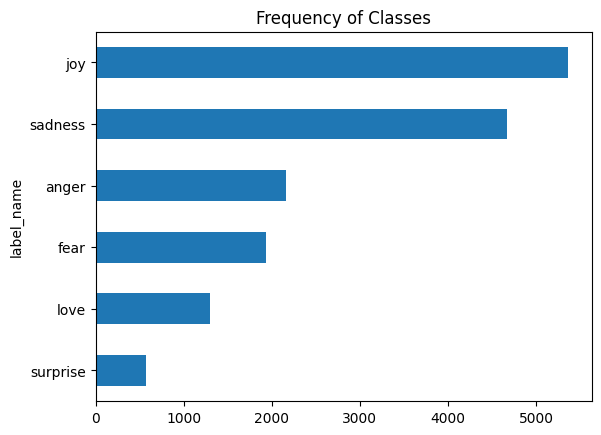

In [ ]:
label_counts = df['label_name'].value_counts(ascending=True)
label_counts.plot.barh()
plt.title("Frequency of Classes")
plt.show()

<Axes: title={'center': 'Words per Tweet'}, xlabel='label_name'>

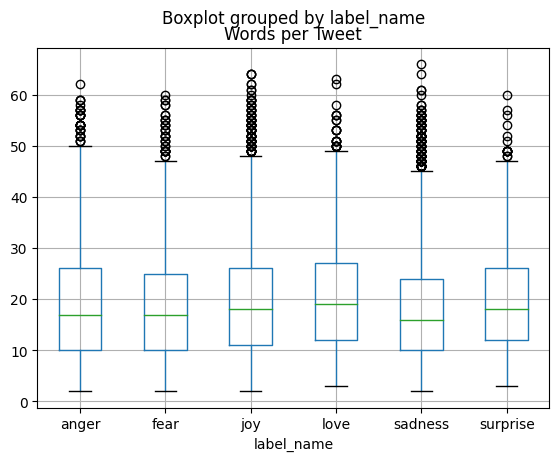

In [ ]:
df['Words per Tweet'] = df['text'].str.split().apply(len)
df.boxplot("Words per Tweet", by="label_name")

## Text to Tokens Conversion
- Transformer models like BERT cannot receive raw strings as input; instead, they assume the text has been tokenized and encoded as numerical vectors.
- Tokenization is the step of breaking down a string into the atomic units used in the model

In [ ]:
from transformers import AutoTokenizer
from pprint import pprint

tokenizer = AutoTokenizer.from_pretrained("bert-base-uncased")

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


In [ ]:
text = "I love machine learning! Tokenization is awesome!!"

In [ ]:
encoded_text = tokenizer(text)

In [ ]:
encoded_text

{'input_ids': [101, 1045, 2293, 3698, 4083, 999, 19204, 3989, 2003, 12476, 999, 999, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
encoded_text.input_ids

[101, 1045, 2293, 3698, 4083, 999, 19204, 3989, 2003, 12476, 999, 999, 102]

In [ ]:
encoded_text.attention_mask

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]

In [ ]:
tokens = tokenizer.convert_ids_to_tokens(encoded_text.input_ids)
print(tokens)

['[CLS]', 'i', 'love', 'machine', 'learning', '!', 'token', '##ization', 'is', 'awesome', '!', '!', '[SEP]']


In [ ]:
tokenizer.model_max_length

512

In [ ]:
tokenizer.vocab_size

30522

In [ ]:
# tokenizer.vocab

In [ ]:
len(tokenizer.vocab)

30522

In [ ]:
tokenizer.special_tokens_map

{'unk_token': '[UNK]',
 'sep_token': '[SEP]',
 'pad_token': '[PAD]',
 'cls_token': '[CLS]',
 'mask_token': '[MASK]'}

In [ ]:
tokenizer.cls_token

'[CLS]'

In [ ]:
tokenizer.cls_token_id

101

In [ ]:
tokenizer.sep_token

'[SEP]'

In [ ]:
tokenizer.sep_token_id

102

In [ ]:
tokenizer.decode([102])

'[SEP]'

In [ ]:
for i in encoded_text.input_ids:
  print(f"{str(i):5} --> {tokenizer.decode([i])}")

101   --> [CLS]
1045  --> i
2293  --> love
3698  --> machine
4083  --> learning
999   --> !
19204 --> token
3989  --> ##ization
2003  --> is
12476 --> awesome
999   --> !
999   --> !
102   --> [SEP]


## Data Loader and Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(df, test_size=0.3, stratify=df['label_name'])
test, validation = train_test_split(test, test_size=1/3, stratify=test['label_name'])

train.shape, test.shape, validation.shape

((11200, 4), (3200, 4), (1600, 4))

In [ ]:
from datasets import Dataset, DatasetDict

In [ ]:
dataset = DatasetDict(
    {
        "train": Dataset.from_pandas(train, preserve_index=False),
        "test": Dataset.from_pandas(test, preserve_index=False),
        "validation": Dataset.from_pandas(validation, preserve_index=False)
    }
)

dataset

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_name', 'Words per Tweet'],
        num_rows: 11200
    })
    test: Dataset({
        features: ['text', 'label', 'label_name', 'Words per Tweet'],
        num_rows: 3200
    })
    validation: Dataset({
        features: ['text', 'label', 'label_name', 'Words per Tweet'],
        num_rows: 1600
    })
})

In [ ]:
dataset['train']

Dataset({
    features: ['text', 'label', 'label_name', 'Words per Tweet'],
    num_rows: 11200
})

In [ ]:
dataset['train'][0]

{'text': 'i realize that this conversation can make some people feel paranoid or upset generally',
 'label': 4,
 'label_name': 'fear',
 'Words per Tweet': 14}

In [ ]:
dataset['train'][1]

{'text': 'i feel humiliated by the person who phoned',
 'label': 0,
 'label_name': 'sadness',
 'Words per Tweet': 8}

In [ ]:
dataset['train'][1]['text']

'i feel humiliated by the person who phoned'

In [ ]:
dataset['train'][:2]

{'text': ['i realize that this conversation can make some people feel paranoid or upset generally',
  'i feel humiliated by the person who phoned'],
 'label': [4, 0],
 'label_name': ['fear', 'sadness'],
 'Words per Tweet': [14, 8]}

In [ ]:
dataset['train'][:2]['text']

['i realize that this conversation can make some people feel paranoid or upset generally',
 'i feel humiliated by the person who phoned']

In [ ]:
def tokenize(batch):
  temp = tokenizer(batch['text'], padding=True, truncation=True) # max_length
  return temp

In [ ]:
tokenize(dataset['train'][0])

{'input_ids': [101, 1045, 5382, 2008, 2023, 4512, 2064, 2191, 2070, 2111, 2514, 19810, 2030, 6314, 3227, 102], 'token_type_ids': [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], 'attention_mask': [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]}

In [ ]:
tokenize(dataset['train'][300:302])

{'input_ids': [[101, 1045, 2467, 2018, 2023, 4997, 10617, 2043, 1045, 2001, 2356, 2055, 2893, 6875, 1998, 2026, 3335, 10010, 2401, 3351, 1045, 2467, 2939, 2185, 2013, 2216, 11450, 3110, 5399, 15807, 102, 0, 0, 0, 0, 0], [101, 1045, 2409, 2014, 2009, 2001, 7929, 2005, 2014, 2000, 2514, 1996, 2126, 2016, 2001, 3110, 1998, 2008, 2016, 2097, 2467, 2031, 2116, 13545, 5758, 1997, 2256, 2210, 2160, 2144, 2009, 2001, 2014, 2034, 2188, 102]], 'token_type_ids': [[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]], 'attention_mask': [[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0], [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]]}

In [ ]:
emotion_encoded = dataset.map(tokenize, batched=True, batch_size=None)

Map:   0%|          | 0/11200 [00:00<?, ? examples/s]

Map:   0%|          | 0/3200 [00:00<?, ? examples/s]

Map:   0%|          | 0/1600 [00:00<?, ? examples/s]

In [ ]:
emotion_encoded

DatasetDict({
    train: Dataset({
        features: ['text', 'label', 'label_name', 'Words per Tweet', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 11200
    })
    test: Dataset({
        features: ['text', 'label', 'label_name', 'Words per Tweet', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 3200
    })
    validation: Dataset({
        features: ['text', 'label', 'label_name', 'Words per Tweet', 'input_ids', 'token_type_ids', 'attention_mask'],
        num_rows: 1600
    })
})

In [ ]:
# emotion_encoded['train'][0]

In [ ]:
label2id = {x['label_name']:x['label'] for x in dataset['train']}
id2label = {v:k for k,v in label2id.items()}

In [ ]:
label2id

{'fear': 4, 'sadness': 0, 'joy': 1, 'anger': 3, 'surprise': 5, 'love': 2}

In [ ]:
id2label

{4: 'fear', 0: 'sadness', 1: 'joy', 3: 'anger', 5: 'surprise', 2: 'love'}

## Model Building

In [ ]:
from transformers import AutoModel

model = AutoModel.from_pretrained("bert-base-uncased")

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
model

BertModel(
  (embeddings): BertEmbeddings(
    (word_embeddings): Embedding(30522, 768, padding_idx=0)
    (position_embeddings): Embedding(512, 768)
    (token_type_embeddings): Embedding(2, 768)
    (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
    (dropout): Dropout(p=0.1, inplace=False)
  )
  (encoder): BertEncoder(
    (layer): ModuleList(
      (0-11): 12 x BertLayer(
        (attention): BertAttention(
          (self): BertSdpaSelfAttention(
            (query): Linear(in_features=768, out_features=768, bias=True)
            (key): Linear(in_features=768, out_features=768, bias=True)
            (value): Linear(in_features=768, out_features=768, bias=True)
            (dropout): Dropout(p=0.1, inplace=False)
          )
          (output): BertSelfOutput(
            (dense): Linear(in_features=768, out_features=768, bias=True)
            (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
            (dropout): Dropout(p=0.1, inplace=False

In [ ]:
model.config.hidden_size

768

In [ ]:
model.config.num_hidden_layers

12

In [ ]:
model.config.num_attention_heads

12

In [ ]:
model.config.architectures

['BertForMaskedLM']

In [ ]:
model.config

BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.44.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

## Fine-Tuning Transformers

In [ ]:
from transformers import AutoModelForSequenceClassification, AutoConfig
import torch

In [ ]:
num_labels = len(label2id)
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
config = AutoConfig.from_pretrained("bert-base-uncased", num_labels=num_labels, id2label=id2label, label2id=label2id)

model = AutoModelForSequenceClassification.from_pretrained("bert-base-uncased", config=config).to(device)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
device

device(type='cuda')

In [ ]:
model

BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(30522, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0-11): 12 x BertLayer(
          (attention): BertAttention(
            (self): BertSdpaSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e

In [ ]:
model.config

BertConfig {
  "_name_or_path": "bert-base-uncased",
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "id2label": {
    "0": "sadness",
    "1": "joy",
    "2": "love",
    "3": "anger",
    "4": "fear",
    "5": "surprise"
  },
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "label2id": {
    "anger": 3,
    "fear": 4,
    "joy": 1,
    "love": 2,
    "sadness": 0,
    "surprise": 5
  },
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "transformers_version": "4.44.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}

In [ ]:
from transformers import TrainingArguments

In [ ]:
batch_size = 64
training_dir = "bert_base_train_dir"

traning_args = TrainingArguments(
    output_dir=training_dir,
    overwrite_output_dir=True,
    learning_rate=2e-5,
    num_train_epochs=3,
    per_device_train_batch_size=batch_size,
    per_device_eval_batch_size=batch_size,
    weight_decay=0.01,
    evaluation_strategy="epoch",
    # save_strategy="epoch",
    # load_best_model_at_end=True,
    disable_tqdm=False
)

/usr/local/lib/python3.10/dist-packages/transformers/training_args.py:1525: FutureWarning: `evaluation_strategy` is deprecated and will be removed in version 4.46 of 🤗 Transformers. Use `eval_strategy` instead
  warnings.warn(


In [ ]:
import evaluate
import numpy as np

accuracy = evaluate.load("accuracy")

def compute_metrics_evaluate(eval_pred):
    predictions, labels = eval_pred
    predictions = np.argmax(predictions, axis=1)
    return accuracy.compute(predictions=predictions, references=labels)

In [ ]:
# use sklearn to build compute metrics
from sklearn.metrics import accuracy_score, f1_score

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)

    f1 = f1_score(labels, preds, average="weighted")
    acc = accuracy_score(labels, preds)

    return {"accuracy": acc, "f1": f1}


In [ ]:
from transformers import Trainer


trainer = Trainer(
    model=model,
    args=traning_args,
    train_dataset=emotion_encoded["train"],
    eval_dataset=emotion_encoded["validation"],
    compute_metrics=compute_metrics,
    tokenizer=tokenizer
)

In [ ]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.405988,0.878750,0.878431
2,No log,0.226943,0.916250,0.915424
3,0.510200,0.206755,0.920000,0.919872


TrainOutput(global_step=525, training_loss=0.4937909353347052, metrics={'train_runtime': 478.7362, 'train_samples_per_second': 70.185, 'train_steps_per_second': 1.097, 'total_flos': 1502253632275200.0, 'train_loss': 0.4937909353347052, 'epoch': 3.0})

## Model Evaluation

In [ ]:
pred_output = trainer.predict(emotion_encoded['test'])
pred_output.metrics

{'test_loss': 0.19260063767433167,
 'test_accuracy': 0.9215625,
 'test_f1': 0.9212499633260923,
 'test_runtime': 13.8172,
 'test_samples_per_second': 231.595,
 'test_steps_per_second': 3.619}

In [ ]:
y_pred = pred_output.predictions.argmax(-1)
y_true = emotion_encoded['test']['label']

In [ ]:
from sklearn.metrics import classification_report

print(classification_report(y_true, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       933
           1       0.95      0.93      0.94      1072
           2       0.80      0.85      0.83       261
           3       0.92      0.93      0.92       432
           4       0.87      0.90      0.89       387
           5       0.89      0.68      0.77       115

    accuracy                           0.92      3200
   macro avg       0.90      0.88      0.88      3200
weighted avg       0.92      0.92      0.92      3200



In [ ]:
# plot confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt

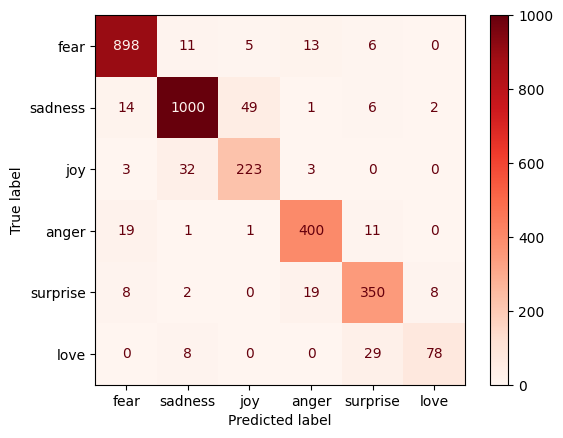

In [ ]:
ConfusionMatrixDisplay.from_predictions(y_true, y_pred, display_labels=label2id.keys(),cmap='Reds')
plt.show()

## Build Prediction Function and Store Model

In [ ]:
text = "I am super happy today. I got it done. Finally!!"

def get_prediction(text):
    input_encoded = tokenizer(text, return_tensors='pt').to(device)

    with torch.no_grad():
        outputs = model(**input_encoded)

    logits = outputs.logits

    pred = torch.argmax(logits, dim=1).item()
    return id2label[pred]

get_prediction(text)

'joy'

In [ ]:
trainer.save_model("bert-base-uncased-sentiment-model")

In [ ]:
# use pipeline for prediciton
from transformers import pipeline

classifier = pipeline('text-classification', model= 'bert-base-uncased-sentiment-model')

classifier([text, 'hello, how are you?', "love you", "i am feeling low"])

Hardware accelerator e.g. GPU is available in the environment, but no `device` argument is passed to the `Pipeline` object. Model will be on CPU.


[{'label': 'joy', 'score': 0.984377384185791},
 {'label': 'joy', 'score': 0.8110564351081848},
 {'label': 'love', 'score': 0.7909902334213257},
 {'label': 'sadness', 'score': 0.9884894490242004}]

## Save to Drive

In [ ]:
# cp -r "/content/bert-base-uncased-sentiment-model" "/content/drive/MyDrive/Udemy-Courses/Fine-Tuning-LLM-with-Hugging-Face-Transformers-for-NLP/05-Fine_Tuning_BERT_for_Sentiment"